#Reconociendo señales de tránsito

El objetivo de este proyecto es construir un modelo capaz de determinar el tipo de señal de tránsito que se muestra en una imagen capturada en diferentes condiciones de la vida real y que muestre obstrucciones, mala iluminación o incluso que la señal esté lejos de la cámara. 

##Datos

###Descarga de dataset

In [1]:
# Descargar datos 
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_3.zip 

mkdir: cannot create directory ‘dataroot’: File exists
--2022-02-06 19:56:20--  https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32074743 (31M) [application/zip]
Saving to: ‘dataroot/data_1.zip.1’

data_1.zip.1        100%[===================>]  30.59M  86.7MB/s    in 0.4s    

2022-02-06 19:56:21 (86.7 MB/s) - ‘dataroot/data_1.zip.1’ saved [32074743/32074743]

--2022-02-06 19:56:21--  https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to 

In [2]:
# Descomprimir 
import zipfile
with zipfile.ZipFile(dataroot+"data_1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_2.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_3.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)# Descomprimir 
import zipfile
with zipfile.ZipFile(dataroot+"data_1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_2.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_3.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)

### Nombres de señales, tamaño y ejemplo

In [3]:
# Cargar nombres de las señales 
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/signnames.csv")
signnames = pd.Series(df.SignName.values,index=df.ClassId).to_dict()
signnames

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [4]:
# cargar las imágenes 
import pickle

signimages_train = pickle.load(open(dataroot+"train.p", "rb"))  #Datos de entrenamiento
signimages_test = pickle.load(open(dataroot+"test.p", "rb"))    #Datos de prueba
signimages_valid = pickle.load(open(dataroot+"valid.p", "rb"))    #Datos de validación

X_train = signimages_train['features']
X_test = signimages_test['features']
X_val = signimages_valid['features']

y_train = signimages_train['labels']
y_test = signimages_test['labels']
y_val = signimages_valid['labels']

assert(X_train.shape[0] == y_train.shape[0]), "No. of Images is not equals to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "No. of Images is not equals to number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "No. of Images is not equals to number of labels"

assert(X_train.shape[1:] == (32,32,3)), "The Dimesnsions of the images are not 32 x 32 x 3"
assert(X_val.shape[1:] == (32,32,3)), "The Dimesnsions of the images are not 32 x 32 x 3"
assert(X_test.shape[1:] == (32,32,3)), "The Dimesnsions of the images are not 32 x 32 x 3"

print('Train shape: ', X_train.shape)
print('Test shape: ', X_test.shape)
print('Validate shape: ', X_val.shape)


Train shape:  (34799, 32, 32, 3)
Test shape:  (12630, 32, 32, 3)
Validate shape:  (4410, 32, 32, 3)


The image shows a Speed limit (50km/h) sign


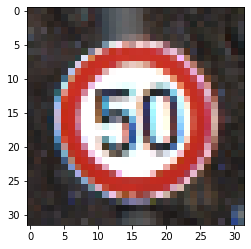

In [5]:
# ver imagen 
import matplotlib.pyplot as plt
import cv2

inx = 1500
plt.imshow(signimages_test['features'][inx])
print("The image shows a {} sign".format(signnames[signimages_test['labels'][inx]]))# ver imagen 

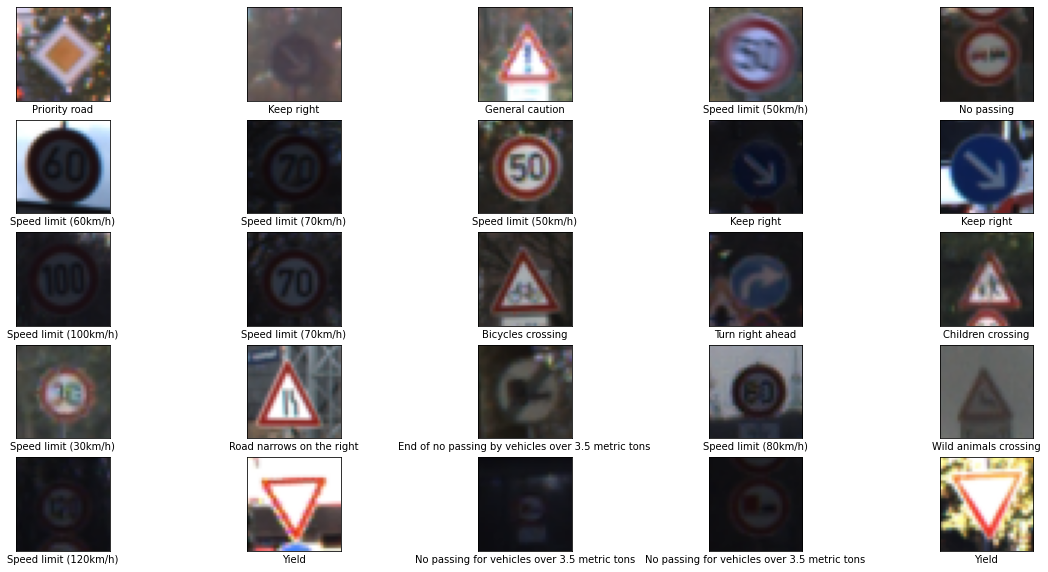

In [6]:
from random import randint

samples = []
for i in range(25):
    rand = randint(0,len(X_train))
    sample = [X_train[rand], y_train[rand]]
    samples.append(sample)

plt.figure(figsize=(20,10))

for i,sample in enumerate(samples):
    imag, label = sample[0], sample[1]
    label = signnames[label] #Paso de número a texto
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imag, cmap=plt.cm.binary)
    plt.xlabel(label)
plt.show()

###Normalizo las imagenes

Para reducir el coste computacional transformo las imágenes a escala de grises, ecualizo la imagen con un histograma de ecualización y normalizo los colores dándoles un valor entre 0 y 1.

Reducir los colores de las imágenes a escala de grises no conlleva a un problema ya que lo importante para identificar las señales son las formas y las líneas independientemente del color que sean.

In [7]:
import numpy as np

def preprocessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_val = np.array(list(map(preprocessing, X_val)))

X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

print('Train shape: ', X_train.shape)
print('Test shape: ', X_test.shape)
print('Validate shape: ', X_val.shape)

Train shape:  (34799, 32, 32, 1)
Test shape:  (12630, 32, 32, 1)
Validate shape:  (4410, 32, 32, 1)


###Muestro imagenes normalizadas

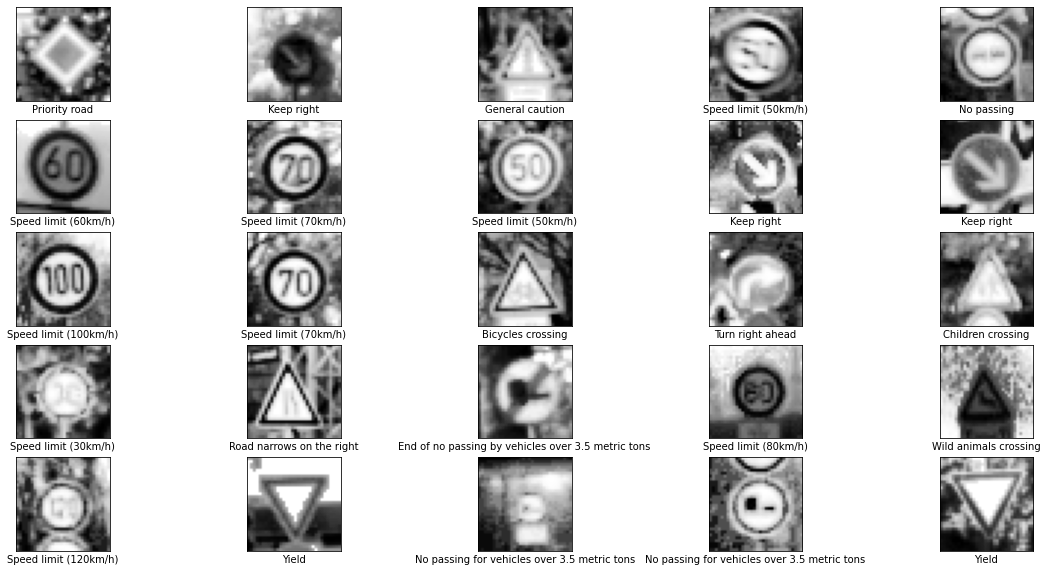

In [8]:
for sample in samples:
    sample[0] = preprocessing(sample[0])

plt.figure(figsize=(20,10))

for i,sample in enumerate(samples):
    img, label = sample[0], sample[1]
    label = signnames[label] #Paso de número a texto
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img,cmap='gray')
    plt.xlabel(label)

plt.show()

###Hago que el Target sea un vector

Por último trasformo el target de un valor de 0 a 42 en un vector lleno de ceros que contenga un 1 en la posición correspondiente al valor del target.

In [9]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

print(f'Ejemplo de target:\n{y_train[0]}')

(34799, 43)
(12630, 43)
(4410, 43)
Ejemplo de target:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


##Red neuronal densa

###Creación y compilación del modelo de la red neuronal densa

A esta red le agrego una capa Flatten para que convierta la imagen en un vector y luego tres capas densas con una activación no lineal y una salida Softmax. Esta salida dará valores a la salida dando "Pesos" a cada índice del vector. Esta activación convierte la salida en una distribución de probabilidad por lo que el índice que contenga el valor máximo se considera como la predicción.

Esto será así para todas las redes neuronales de acá en adelante.

Compilo el modelo utilizando un optimizador Adam y guardando los datos de Loss y accuracy.

In [10]:
import tensorflow as tf

model_dense = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,1)), #Imagenes de 32x32 con 1 colores (enscala de grises)
    tf.keras.layers.Dense(units=50, activation = 'relu'),
    tf.keras.layers.Dense(units=50, activation = 'relu'),
    tf.keras.layers.Dense(units=43, activation='softmax') #La salida con las 43 posibilidades y activación softmax para
                                                          # que la suma de las salidas sea 1
])

model_dense.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

###Visualización de la red neuronal densa

In [11]:
model_dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 50)                51250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 43)                2193      
                                                                 
Total params: 55,993
Trainable params: 55,993
Non-trainable params: 0
_________________________________________________________________


###Entrenamiento de la red neuronal densa

In [12]:
nEpochs = 30 #En todas redes utilizo la misma cantidad de épocas para comparar resultados
generalVerbose = 0 #Para modificar si quiero ver el proceso en todos o no

history_dense = model_dense.fit(
    X_train,
    y_train,
    epochs= nEpochs,
    validation_data=(X_val,y_val),
    verbose=generalVerbose
)

###Evolución del error del modelo denso

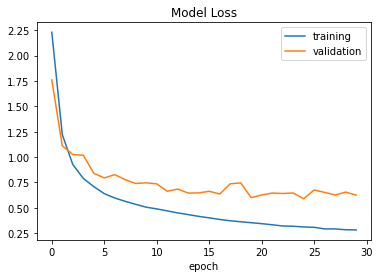

In [13]:
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Model Loss')
plt.xlabel('epoch');

###Evolución de la presicion del modelo denso

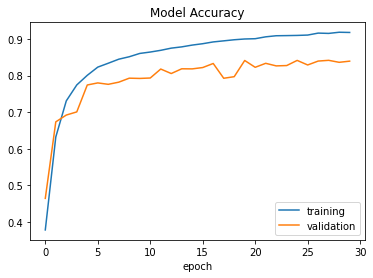

In [14]:
plt.plot(history_dense.history['accuracy'])
plt.plot(history_dense.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Model Accuracy')
plt.xlabel('epoch');

###Evaluacion del modelo denso

In [15]:
score = model_dense.evaluate(X_test, y_test , verbose = 0)
print("The test score is: ",score[0])
print("The Accuracy score is: ",score[1])

The test score is:  1.0462945699691772
The Accuracy score is:  0.7904196381568909


Este tipo de red predice a partir del valor de cada píxel sin contexto de los píxeles que los rodean. Usando imágenes que no estén dentro del dataset que tengan otra iluminación o simplemente estén rotadas no va a ser capaz de llegar a un buen resultado. Para mejorar este defecto utilizo otro tipo de red neuronal, las redes convolucionales.


##Red Neuronal Convolucional

Estas redes hacen una convolución entre los píxeles de las imágenes por lo que el resultado no solo depende de analizar los píxeles en particular sino de analizarlos en conjunto.

###Creación y compilación del modelo convolucional

Agrego una capa convolucional de 5x5, los agrupo con un MaxPooling de 2x2, luego agrego otra capa convolucional de 3x3 y otro MaxPooling igual que el anterior.

Para hacer una comparación con el modelo anterior mantengo las capas densas sin modificaciones.

In [16]:
model_conv = tf.keras.Sequential([
                                  
    tf.keras.layers.Conv2D(60,(5,5), input_shape= (32,32,1), activation = 'relu'), #60 nucleos de 5x5
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)), #Capa de agrupación de 2x2

    tf.keras.layers.Conv2D(30,(3,3), activation = 'relu'), #30 nucleos de 3x3
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)), #Capa de agrupación de 2x2

    tf.keras.layers.Flatten(), #Trasformo a vector simple
    tf.keras.layers.Dense(units=50, activation = 'relu'),
    tf.keras.layers.Dense(units=50, activation = 'relu'),
    tf.keras.layers.Dense(units=43, activation='softmax') #La salida con las 43 posibilidades y activación softmax para
                                                          # que la suma de las salidas sea 1
])

model_conv.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

###Visualización de la red neuronal convolucional

In [17]:
model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 60)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 30)        16230     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 30)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1080)              0         
                                                                 
 dense_3 (Dense)             (None, 50)               

###Entrenamiento de la red convolucional

In [18]:
history_conv = model_conv.fit(
    X_train,
    y_train,
    epochs= nEpochs,
    validation_data=(X_val,y_val),
    verbose=generalVerbose
)

###Evolución del error del modelo convolucional

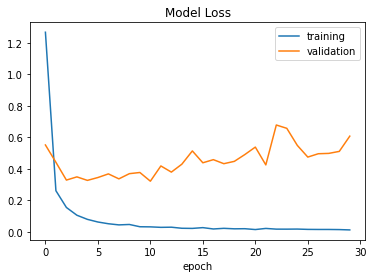

In [19]:
plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Model Loss')
plt.xlabel('epoch');

###Evolución de la presición del modelo convolucional

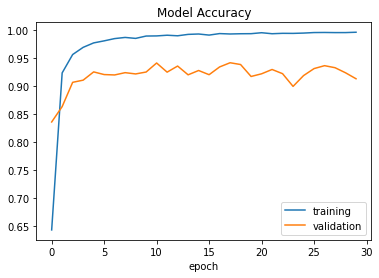

In [20]:
plt.plot(history_conv.history['accuracy'])
plt.plot(history_conv.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Model Accuracy')
plt.xlabel('epoch');

###Evaluación del modelo convolucional

In [21]:
score = model_conv.evaluate(X_test, y_test , verbose = 0)
print("The test score is: ",score[0])
print("The Accuracy score is: ",score[1])

The test score is:  0.8244669437408447
The Accuracy score is:  0.8955661058425903


Esta red superó a la red densa, aprendió más rápido. Sin embargo, a pesar que los resultados de entrenamiento obtuvieron 0.99 de acierto, la validación dejó de subir alrededor de la época 10.

##Red Neuronal Convolucional con cancelación de neuronas

Por último para evitar que la red se desbalancee y muchas neuronas estén siendo determinantes mientras otras no tienen peso al momento de la decisión, se puede utilizar "Dropout" o cancelación de neurona. Eso "desconecta" las neuronas en una época y hace trabajar a la red sin ella lo que equilibra la importancia de las neuronas en la red.

###Creación y compilación del modelo convolucional agregando dropout

Mantengo la red anterior agregandole un DropOut del 50%, lo que significa que existe un 50% de probabilidad quie la neurona se desactive.

In [22]:
model_conv_v2 = tf.keras.Sequential([
                                  
    tf.keras.layers.Conv2D(60,(5,5), input_shape= (32,32,1), activation = 'relu'), #60 nucleos de 5x5
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)), #Capa de agrupación de 2x2

    tf.keras.layers.Conv2D(30,(3,3), activation = 'relu'), #30 nucleos de 3x3
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)), #Capa de agrupación de 2x2

    tf.keras.layers.Dropout(0.5), #En cada época existe 50% de probabilidad que la neurona se desactive

    tf.keras.layers.Flatten(), #Trasformo a vector simple
    tf.keras.layers.Dense(units=50, activation = 'relu'),
    tf.keras.layers.Dense(units=50, activation = 'relu'),
    tf.keras.layers.Dense(units=43, activation='softmax') #La salida con las 43 posibilidades y activación softmax para
                                                          # que la suma de las salidas sea 1
])

model_conv_v2.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

###Visualización de la red neuronal convolucional con dropout

In [23]:
model_conv_v2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 60)        1560      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 60)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 30)        16230     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 30)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 30)          0         
                                                                 
 flatten_2 (Flatten)         (None, 1080)             

###Entrenamiento de la red convolucional con dropout

In [24]:
history_conv_v2 = model_conv_v2.fit(
    X_train,y_train,
    epochs= nEpochs,
    validation_data=(X_val,y_val),
    verbose=generalVerbose
)

###Evolución del error del modelo convolucional con dropout

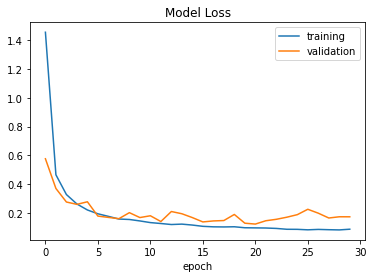

In [25]:
plt.plot(history_conv_v2.history['loss'])
plt.plot(history_conv_v2.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Model Loss')
plt.xlabel('epoch');

###Evolución de la presición del modelo convolucional con dropout

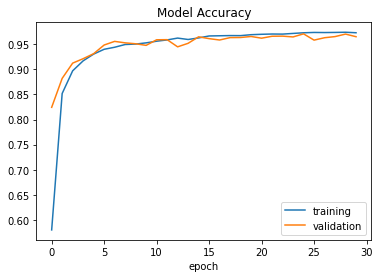

In [26]:
plt.plot(history_conv_v2.history['accuracy'])
plt.plot(history_conv_v2.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Model Accuracy')
plt.xlabel('epoch');

###Evaluación del modelo convolucional con dropout

In [27]:
score = model_conv_v2.evaluate(X_test, y_test , verbose = 0)
print("The test score is: ",score[0])
print("The Accuracy score is: ",score[1])

The test score is:  0.2326262891292572
The Accuracy score is:  0.9454473257064819


Se puede ver como en esta red como los resultados de validación mejoraron a la par que los de entrenamiento, dando un mejor resultado ante las imágenes externas al dataset.

##Comparación de modelos

###Muestro los resultados en conjunto

,Model,Test Score,Accuracy score
0,Dense,1.046295,0.790420
1,Convolucional,0.824467,0.895566
2,Convolucional V2,0.232626,0.945447


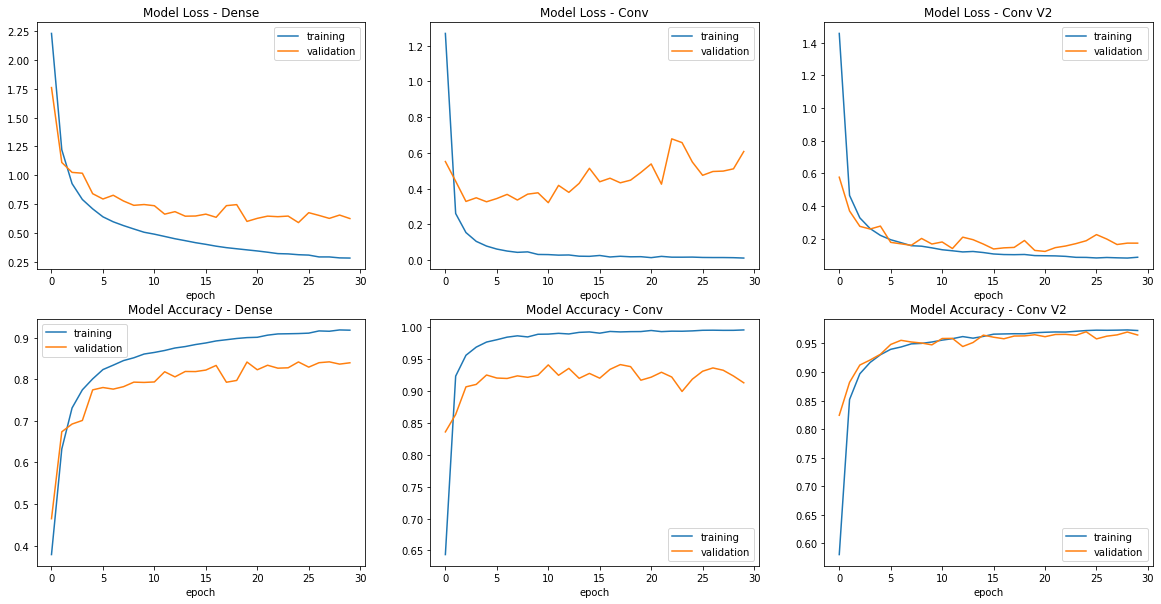

In [28]:
histories = [[history_dense,'Dense'], [history_conv, 'Conv'], [history_conv_v2, 'Conv V2']]

plt.figure(figsize=(20,10))

for idx, history in enumerate(histories):
    plt.subplot(2,3,idx+1)
    plt.plot(history[0].history['loss'])
    plt.plot(history[0].history['val_loss'])
    plt.legend(['training', 'validation'])
    plt.title(f'Model Loss - {history[1]}')
    plt.xlabel('epoch')

    plt.subplot(2,3,idx+4)
    plt.plot(history[0].history['accuracy'])
    plt.plot(history[0].history['val_accuracy'])
    plt.legend(['training', 'validation'])
    plt.title(f'Model Accuracy - {history[1]}')
    plt.xlabel('epoch');

test_score = [model_dense.evaluate(X_test, y_test , verbose = 0), model_conv.evaluate(X_test, y_test , verbose = 0), model_conv_v2.evaluate(X_test, y_test , verbose = 0)]

scores = pd.DataFrame({'Model': ['Dense','Convolucional','Convolucional V2'],
                       'Test Score': [test_score[0][0], test_score[1][0], test_score[2][0]],
                       'Accuracy score': [test_score[0][1], test_score[1][1], test_score[2][1]]})
scores

El modelo denso sirve para identificar las imágenes que estaban dentro del entrenamiento, pero con las que no, como son las de validación tiene mucho error. Esto es como si se "Aprendería de memoria" los datos de entrenamiento pero luego el resultado no es bueno.
En el modelo convolucional sucede algo parecido, el modelo se entrena más rápido, con mejores resultados que el modelo denso pero los resultados de validación no son tan buenos.

Aplicando Dropout, se puede ver que el resultado mejora mucho, a medida que la red aprende con los datos de entrenamiento, de igual manera mejora con los datos de validación.

En el gráfico se ve cómo al ir aumentando la cantidad de capas con distintas funciones mejora el resultado del entrenamiento. Es por esto que la última red es la que mejor desempeño tuvo y la que utilizo para mejorar y lograr el objetivo de identificar las señales de tránsito.
Tomando esta última red, aplicar otros métodos para mejorar el resultado de la misma.

##Realizo aumento de datos

En el aprendizaje de máquina los datos son tan importantes como el mismo modelo, por esto es que además de mejorar el modelo se intenta mejorar el dataset. Para esto utilizo aumento de datos.

Este método utiliza las imágenes del dataset y crea nuevas aplicando rotaciones, corrimientos, inclinaciones y otras modificaciones.

###Creo el generador de imagenes

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range= 30, #ángulo máximo al cual se va a rotar la imagen
    width_shift_range = .2, #Muevo las imagenes hacia los lados
    height_shift_range = .2, #Muevo las imagenes hacia arriba y abajo
    shear_range = 10, #Inclino la imagen
    zoom_range = [.7,1.4], #Acerca o aleja
    vertical_flip = True, #Abilita la rotación vertical
    horizontal_flip = True #Abilita la rotación horizontal
)

datagen.fit(X_train)

###Mejoro el dataset girando, acercando, alejando, moviendo y deformando las imagenes

####Imagenes antes de la modificación

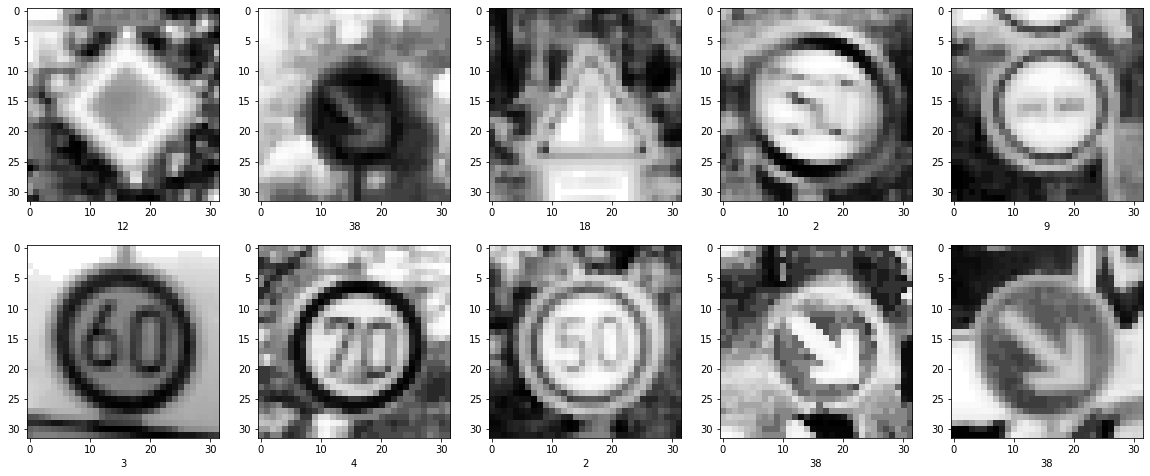

In [30]:
plt.figure(figsize=(20,8))
for i in range(10):
    img, label = samples[i][0], samples[i][1]
    plt.subplot(2,5,i+1)
    plt.imshow(img,cmap='gray')
    plt.xlabel(label)

####Imagenes Luego de la modificación

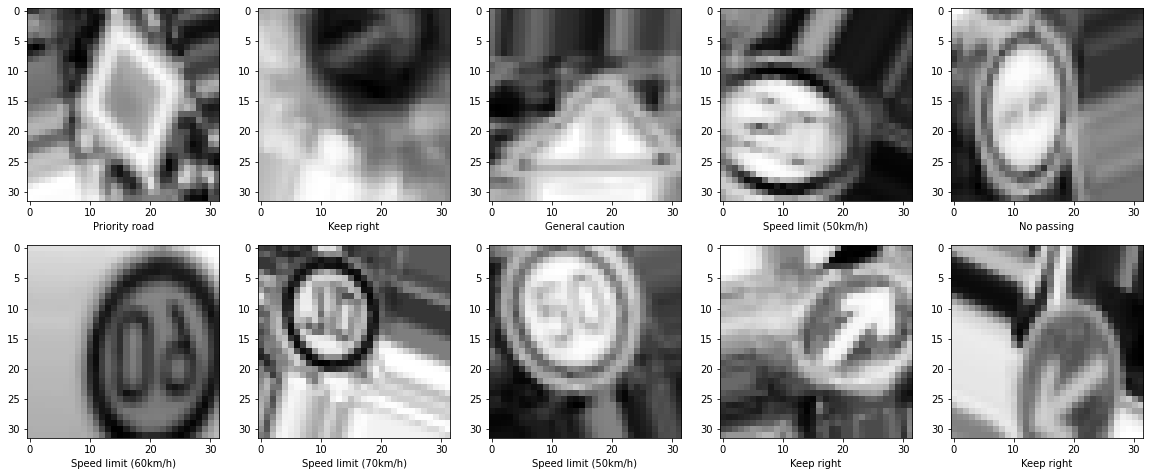

In [31]:
X_samples = []
y_samples = []

for sample in samples:
    X_samples.append(sample[0])
    y_samples.append(sample[1])

plt.figure(figsize=(20,8))

X_samples = np.reshape(X_samples,(25,32,32,1))

for img, label in datagen.flow(X_samples, y_samples, batch_size=10, shuffle = False):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(img[i].reshape(32,32),cmap='gray')
        plt.xlabel(signnames[label[i]])
    break #Cuando sale ya tiene las 10 imagenes, no necesito hacer nada


####Aplico la transformación a todo el dataset y lo agrego a las imagenes que ya tenia

In [32]:
X_y_train_extended = datagen.flow(X_train,y_train, batch_size=50)
X_y_val_extended = datagen.flow(X_val,y_val, batch_size=50)

##Red Neuronal Final
A partir de la red convolucional con dropout, agrego algunas capas, cambio algunos parámetros y luego la entreno con el dataset mejorado.

###Creación y compilación del modelo convolucional final

Agrego al modelo anterior dos capaz conv2D, así tambien más neuronas a las capas densas.

In [33]:
model_final = tf.keras.Sequential([

    tf.keras.layers.Conv2D(60,(3,3), input_shape= (32,32,1), activation = 'relu'),
    tf.keras.layers.Conv2D(60,(3,3), input_shape= (32,32,1), activation = 'relu'), #60 nucleos de 3x3
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)), #Capa de agrupación de 2x2

    tf.keras.layers.Conv2D(60,(3,3), activation = 'relu'), #30 nucleos de 3x3
    tf.keras.layers.Conv2D(60,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)), #Capa de agrupación de 2x2

    tf.keras.layers.Dropout(0.2), #En cada época existe 50% de probabilidad que la neurona se desactive

    tf.keras.layers.Flatten(), #Trasformo a vector simple
    tf.keras.layers.Dense(units=100, activation = 'relu'),
    tf.keras.layers.Dense(units=50, activation = 'relu'), 
    tf.keras.layers.Dense(units=43, activation='softmax') #La salida con las 43 posibilidades y activación softmax para
                                                          # que la suma de las salidas sea 1
])

model_final.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

###Visualización de la red neuronal convolucional final

In [34]:
model_final.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 60)        600       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 60)        32460     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 60)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 60)        32460     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 60)        32460     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 60)         0         
 2D)                                                  

###Entrenamiento de la red convolucional final
Utilizo más épocas que en los entrenamientos anteriores para obtener mejores resultados

In [35]:
history_final = model_final.fit(
    X_y_train_extended,
    epochs=nEpochs*2, #2 Veces el número de epocas que en las redes anteriores
    validation_data=X_y_val_extended,
    verbose=generalVerbose
)

###Evolución del error del modelo final

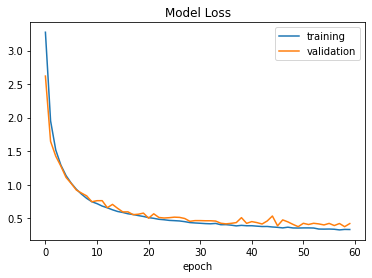

In [36]:
plt.plot(history_final.history['loss'])
plt.plot(history_final.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Model Loss')
plt.xlabel('epoch');

###Evolución de la presición del modelo final

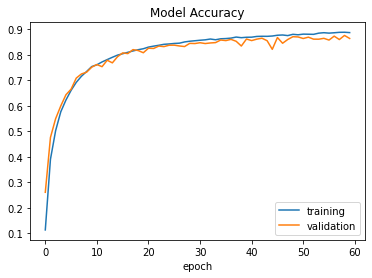

In [37]:
plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Model Accuracy')
plt.xlabel('epoch');

###Evaluación del modelo final

In [38]:
score = model_final.evaluate(X_test, y_test , verbose = 0)
print("The test score is: ",score[0])
print("The Accuracy score is: ",score[1])

The test score is:  0.2929059863090515
The Accuracy score is:  0.9102929830551147


##Pruebas Finales

###Tomo imagenes de internet que no corresponden a la forma de las imagenes con las que se entrenó el modelo

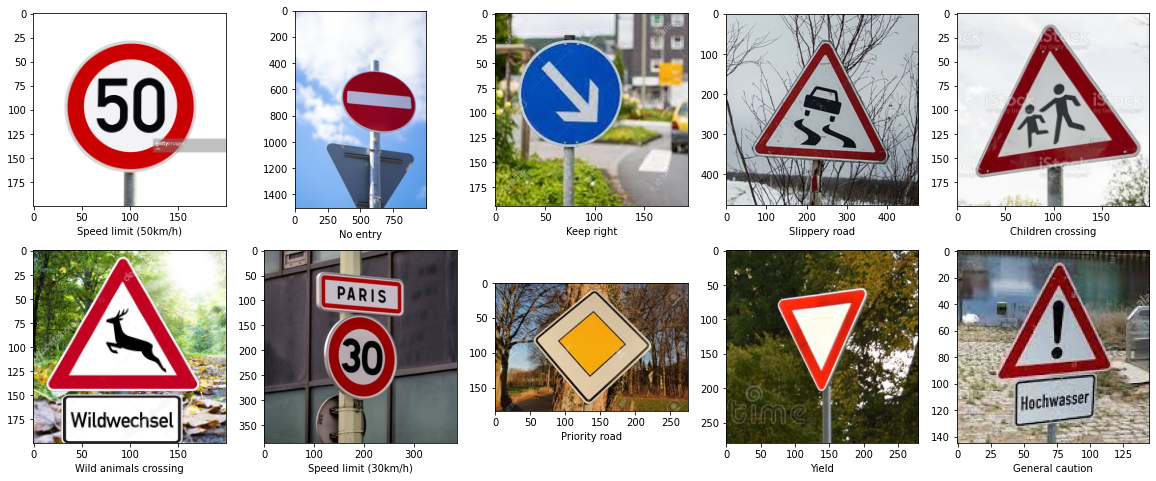

In [39]:
import requests
from PIL import Image

URLs = ['https://raw.githubusercontent.com/AgustinSiben/AprMaq/main/Imagenes_Proyecto_Final/50kmh.jpg',
        'https://raw.githubusercontent.com/AgustinSiben/AprMaq/main/Imagenes_Proyecto_Final/NoEntryB.jpg',
        'https://raw.githubusercontent.com/AgustinSiben/AprMaq/main/Imagenes_Proyecto_Final/keepR.jpg',
        'https://raw.githubusercontent.com/AgustinSiben/AprMaq/main/Imagenes_Proyecto_Final/Slipperyroad.jpg',
        'https://raw.githubusercontent.com/AgustinSiben/AprMaq/main/Imagenes_Proyecto_Final/Childrencrossing.jpg',
        'https://raw.githubusercontent.com/AgustinSiben/AprMaq/main/Imagenes_Proyecto_Final/Wildanimalscrossing.jpg',
        'https://raw.githubusercontent.com/AgustinSiben/AprMaq/main/Imagenes_Proyecto_Final/30kmh.jpg',
        'https://raw.githubusercontent.com/AgustinSiben/AprMaq/main/Imagenes_Proyecto_Final/Priority%20road.jpg',
        'https://raw.githubusercontent.com/AgustinSiben/AprMaq/main/Imagenes_Proyecto_Final/Yield.jpg',
        'https://raw.githubusercontent.com/AgustinSiben/AprMaq/main/Imagenes_Proyecto_Final/Generalcaution.jpg']

URLsLabels = ['Speed limit (50km/h)',
              'No entry',
              'Keep right',
              'Slippery road',
              'Children crossing',
              'Wild animals crossing',
              'Speed limit (30km/h)',
              'Priority road',
              'Yield',
              'General caution']

Imgs = []

for url in URLs:
    r = requests.get(url, stream=True)
    img = Image.open(r.raw)
    Imgs.append(img)


plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(Imgs[i])
    plt.xlabel(URLsLabels[i])

###Acomodo las imagenes para que tenga el mismo formato que las imagenes de entrenamiento

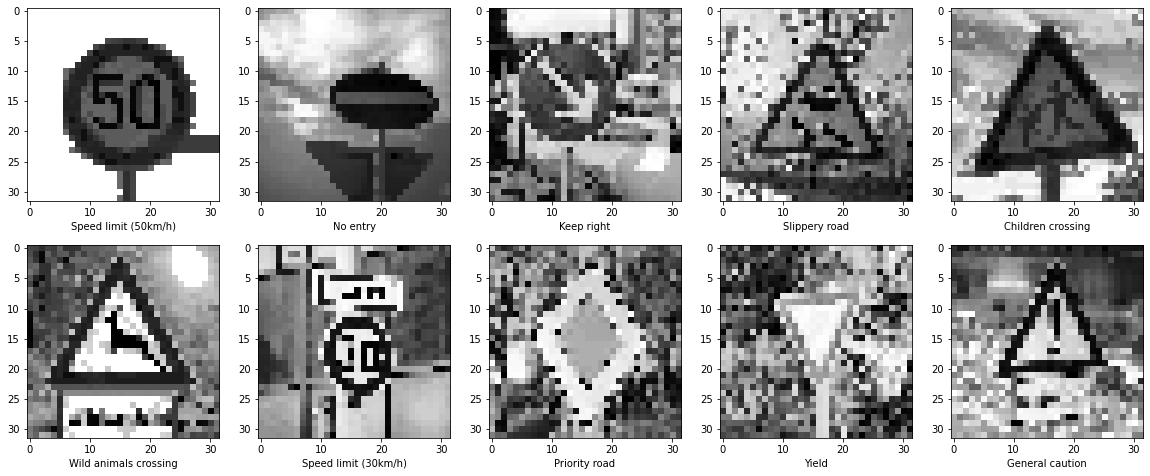

In [40]:
def processingOtherImg(img):
    img = np.asarray(img)
    img = cv2.resize(img, (32, 32),interpolation = cv2.INTER_NEAREST)
    img = preprocessing(img)
    return img

ImgsOriginal = Imgs
Imgs = np.array(list(map(processingOtherImg, Imgs)))

plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(Imgs[i], cmap='gray')
    plt.xlabel(URLsLabels[i])


###Haciendo predicciones con todos los modelos

,Resultado esperado,Denso,Convolucional,Convolucional V2,Final
0,Speed limit (50km/h),Speed limit (50km/h),No vehicles,Speed limit (50km/h),Speed limit (50km/h)
1,No entry,Roundabout mandatory,Priority road,End of no passing by vehicles over 3.5 metric ...,No entry
2,Keep right,Children crossing,End of no passing,Keep right,Keep right
3,Slippery road,No entry,Dangerous curve to the right,Go straight or left,Slippery road
4,Children crossing,Speed limit (80km/h),Bicycles crossing,Children crossing,Children crossing
5,Wild animals crossing,Priority road,Dangerous curve to the right,Wild animals crossing,Wild animals crossing
6,Speed limit (30km/h),Children crossing,Ahead only,Speed limit (80km/h),Roundabout mandatory
7,Priority road,Roundabout mandatory,Priority road,Priority road,Priority road
8,Yield,Ahead only,Yield,Yield,Slippery road
9,General caution,No entry,Dangerous curve to the left,No passing for vehicles over 3.5 metric tons,General caution


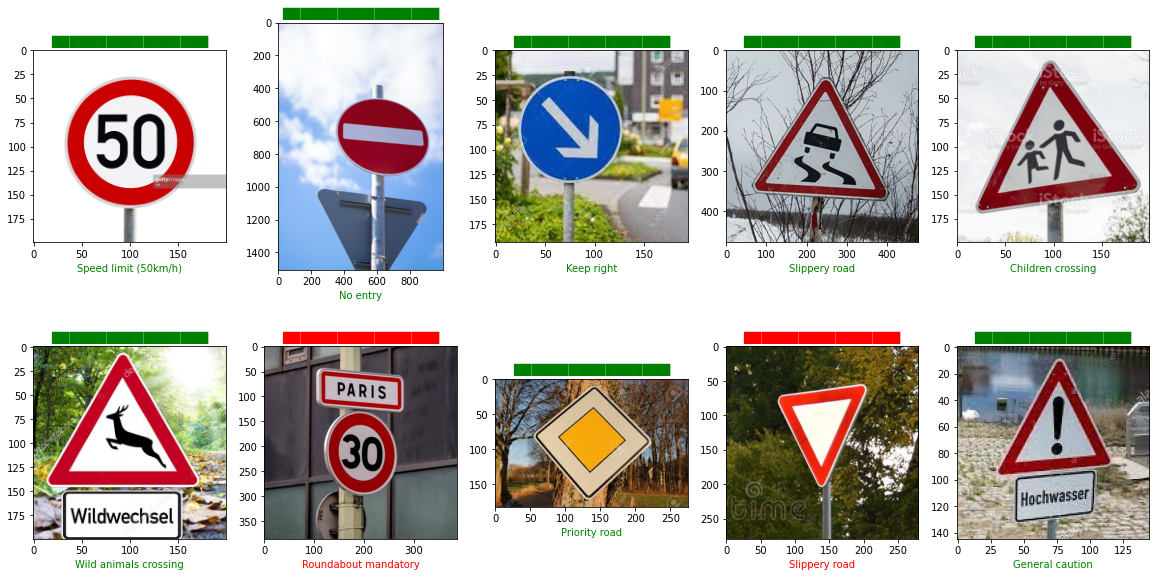

In [41]:
results_dense = model_dense.predict(Imgs)
results_conv = model_conv.predict(Imgs)
results_conv_v2 = model_conv_v2.predict(Imgs)
results_final = model_final.predict(Imgs)

predictions = [model_dense.predict(Imgs), model_conv.predict(Imgs), model_conv_v2.predict(Imgs), model_final.predict(Imgs)]
predictions_models = ['Denso','Convolucional','Convolucional V2','Final']

df_results = pd.DataFrame()
df_results['Resultado esperado'] = URLsLabels

for idx, prediction in enumerate(predictions):
    data = []
    for result in prediction:
        data.append(signnames[np.argmax(result)])
    df_results[predictions_models[idx]] = data

fig = plt.figure(figsize=(20,10))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(ImgsOriginal[i])
    color = 'green' if (df_results['Final'][i] == df_results['Resultado esperado'][i]) else 'red'
    plt.xlabel(df_results['Final'][i], c=color)
    plt.title('█████████████████', c=color)

df_results

###Se puede ver que el resultado de la predicción es bueno logrando interpretar casi en todos los casos cuál era la señal de tránsito. También, en el historial como la red tiene un aprendizaje continuo mejorando la precisión, teniendo un menor error y superando a los modelos anteriores. 